In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
os.listdir()

['RJTF.01.03.2013.01.03.2023.1.0.0.en.utf8.00000000.xls.gz',
 'WeatherAnalysis.ipynb',
 'weather_Tokyo.xls',
 '.ipynb_checkpoints']

In [3]:
data = pd.read_excel("weather_Tokyo.xls", skiprows = 6)[::-1]


In [4]:
data


,Local time in Chofu (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
35803,01.03.2013 09:00,13.0,756.7,760.5,51.0,Wind blowing from the south,7,NaN,NaN,NaN,"Few clouds (10-30%) 900 m, scattered clouds (4...",10.0 and more,3.0
35802,01.03.2013 10:00,15.0,755.9,759.7,34.0,Wind blowing from the south,7,12.0,NaN,NaN,"Few clouds (10-30%) 900 m, broken clouds (60-90%)",10.0 and more,-1.0
35801,01.03.2013 11:00,16.0,755.2,759.0,31.0,Wind blowing from the south,10,17.0,NaN,NaN,"Few clouds (10-30%) 750 m, broken clouds (60-90%)",10.0 and more,-1.0
35800,01.03.2013 12:00,16.0,753.9,757.7,36.0,Wind blowing from the south-southwest,9,15.0,NaN,NaN,"Few clouds (10-30%) 750 m, scattered clouds (4...",10.0 and more,1.0
35799,01.03.2013 13:00,16.0,752.5,756.2,42.0,Wind blowing from the south-west,9,15.0,NaN,NaN,"Few clouds (10-30%) 750 m, broken clouds (60-90%)",10.0 and more,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,01.03.2023 12:00,16.0,759.7,763.5,25.0,variable wind direction,1,NaN,NaN,NaN,No Significant Clouds,10.0 and more,-4.0
3,01.03.2023 13:00,18.0,759.1,762.8,28.0,variable wind direction,1,NaN,NaN,NaN,No Significant Clouds,10.0 and more,-1.0
2,01.03.2023 14:00,18.0,758.3,762.0,28.0,Wind blowing from the south,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,-1.0
1,01.03.2023 15:00,17.0,757.4,761.2,32.0,Wind blowing from the south-southeast,4,NaN,NaN,NaN,No Significant Clouds,10.0 and more,0.0


<Axes: >

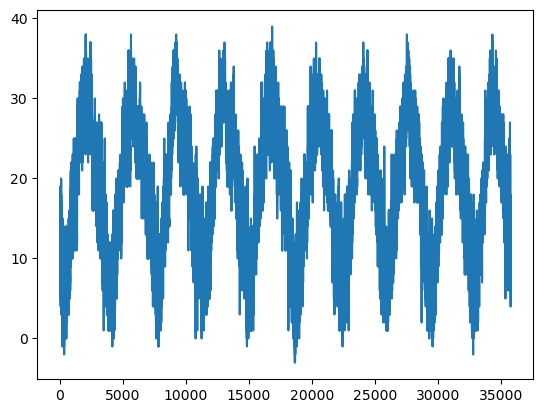

In [5]:
data['T'].plot()

In [6]:
data.index

RangeIndex(start=35803, stop=-1, step=-1)

In [7]:
#data.index = pd.to_datetime(data["Local time in Chofu (airport)"], format = '%d.%m.%Y %H:%M')
data['date'] = pd.to_datetime(data["Local time in Chofu (airport)"], dayfirst = True, format = '%d.%m.%Y %H:%M')
data

,Local time in Chofu (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,date
35803,01.03.2013 09:00,13.0,756.7,760.5,51.0,Wind blowing from the south,7,NaN,NaN,NaN,"Few clouds (10-30%) 900 m, scattered clouds (4...",10.0 and more,3.0,2013-03-01 09:00:00
35802,01.03.2013 10:00,15.0,755.9,759.7,34.0,Wind blowing from the south,7,12.0,NaN,NaN,"Few clouds (10-30%) 900 m, broken clouds (60-90%)",10.0 and more,-1.0,2013-03-01 10:00:00
35801,01.03.2013 11:00,16.0,755.2,759.0,31.0,Wind blowing from the south,10,17.0,NaN,NaN,"Few clouds (10-30%) 750 m, broken clouds (60-90%)",10.0 and more,-1.0,2013-03-01 11:00:00
35800,01.03.2013 12:00,16.0,753.9,757.7,36.0,Wind blowing from the south-southwest,9,15.0,NaN,NaN,"Few clouds (10-30%) 750 m, scattered clouds (4...",10.0 and more,1.0,2013-03-01 12:00:00
35799,01.03.2013 13:00,16.0,752.5,756.2,42.0,Wind blowing from the south-west,9,15.0,NaN,NaN,"Few clouds (10-30%) 750 m, broken clouds (60-90%)",10.0 and more,3.0,2013-03-01 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,01.03.2023 12:00,16.0,759.7,763.5,25.0,variable wind direction,1,NaN,NaN,NaN,No Significant Clouds,10.0 and more,-4.0,2023-03-01 12:00:00
3,01.03.2023 13:00,18.0,759.1,762.8,28.0,variable wind direction,1,NaN,NaN,NaN,No Significant Clouds,10.0 and more,-1.0,2023-03-01 13:00:00
2,01.03.2023 14:00,18.0,758.3,762.0,28.0,Wind blowing from the south,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,-1.0,2023-03-01 14:00:00
1,01.03.2023 15:00,17.0,757.4,761.2,32.0,Wind blowing from the south-southeast,4,NaN,NaN,NaN,No Significant Clouds,10.0 and more,0.0,2023-03-01 15:00:00


In [55]:
#mask = data.index.hour == 12
#data = data[mask]
#data

#data['date'][3].hour  == 12
#condition = data['date'].hour == 12
#condition
#data = data[condition]
#data

datafiltered = data.loc[data['date'].dt.hour == 12]
#datafiltered
data = datafiltered

In [56]:
data = data.sort_values('date')
data = data.reset_index()
data

,level_0,index,Local time in Chofu (airport),T,P0,P,U,DD,Ff,ff10,...,W'W',c,VV,Td,date,Tmin,Tmax,Tmean,quantile_95,quantile_05
0,3,35800,01.03.2013 12:00,16.0,753.9,757.7,36.0,Wind blowing from the south-southwest,9,15.0,...,NaN,"Few clouds (10-30%) 750 m, scattered clouds (4...",10.0 and more,1.0,2013-03-01 12:00:00,-3.0,39.0,18.827932,32.0,5.0
1,11,35792,02.03.2013 12:00,11.0,750.1,753.9,16.0,Wind blowing from the north,11,17.0,...,NaN,Few clouds (10-30%) 900 m,10.0 and more,-14.0,2013-03-02 12:00:00,-3.0,39.0,18.827932,32.0,5.0
2,19,35784,03.03.2013 12:00,8.0,756.6,760.5,27.0,Wind blowing from the north-northeast,5,NaN,...,NaN,No Significant Clouds,10.0 and more,-10.0,2013-03-03 12:00:00,-3.0,39.0,18.827932,32.0,5.0
3,27,35776,04.03.2013 12:00,7.0,758.1,762.0,42.0,Wind blowing from the east-northeast,2,NaN,...,NaN,"Scattered clouds (40-50%) 1050 m, broken cloud...",10.0 and more,-5.0,2013-03-04 12:00:00,-3.0,39.0,18.827932,32.0,5.0
4,35,35768,05.03.2013 12:00,11.0,760.5,764.3,35.0,Wind blowing from the south-west,2,NaN,...,NaN,Few clouds (10-30%) 900 m,10.0 and more,-4.0,2013-03-05 12:00:00,-3.0,39.0,18.827932,32.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,35763,40,25.02.2023 12:00,10.0,758.9,762.8,35.0,Wind blowing from the north,6,NaN,...,NaN,No Significant Clouds,10.0 and more,-5.0,2023-02-25 12:00:00,-3.0,39.0,18.827932,32.0,5.0
3855,35772,31,26.02.2023 12:00,10.0,765.0,768.9,22.0,Wind blowing from the north,9,NaN,...,NaN,Few clouds (10-30%) 900 m,10.0 and more,-11.0,2023-02-26 12:00:00,-3.0,39.0,18.827932,32.0,5.0
3856,35781,22,27.02.2023 12:00,12.0,769.5,773.4,26.0,Wind blowing from the south-southeast,3,NaN,...,NaN,No Significant Clouds,10.0 and more,-7.0,2023-02-27 12:00:00,-3.0,39.0,18.827932,32.0,5.0
3857,35790,13,28.02.2023 12:00,19.0,765.1,768.9,21.0,Wind blowing from the south-southwest,5,NaN,...,NaN,Few clouds (10-30%) 900 m,10.0 and more,-4.0,2023-02-28 12:00:00,-3.0,39.0,18.827932,32.0,5.0


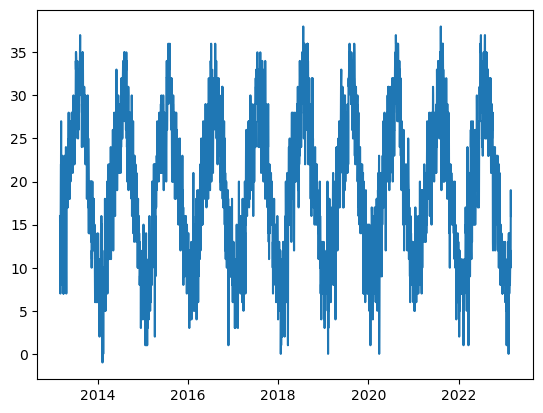

In [57]:
#data['T'].plot()
plt.plot(data['date'], data['T'])

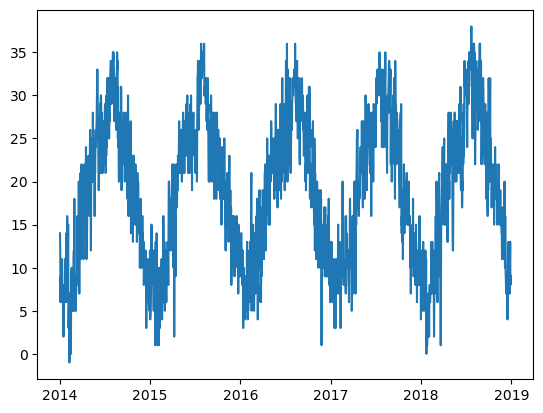

In [58]:
start_date = pd.Timestamp(day=1, month=1, year=2014)
end_date = pd.Timestamp(day=31, month=12, year=2018)

condition1 = data['date'] >= start_date
data1 = data[condition1]
condition2 = data1['date'] <= end_date
data2 = data1[condition2]

# other methods to filter initial data:
#
# 1) data3 = data[condition1 & condition2]
#
# 2) data4 = data[data['date'].between(start_date, end_date)]
#
#


x = data2['date']
y = data2['T']
plt.plot(x,y)

In [59]:
data['T'].max(), data['T'].min(), data['T'].mean()

(38.0, -1.0, 19.369266649391033)

In [60]:
data['Tmin'] = data['T'].min()
data['Tmax'] = data['T'].max()
data['Tmean'] = data['T'].mean()

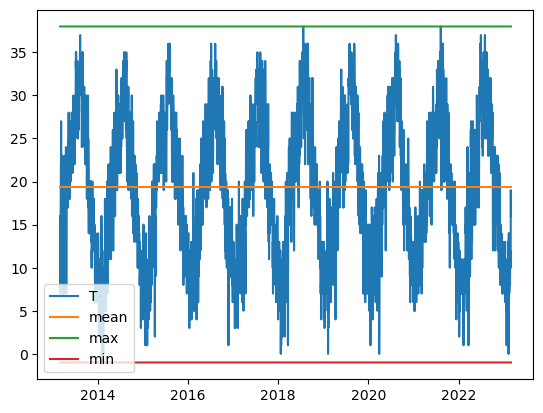

In [61]:
x = data['date']
plt.plot(x, data['T'], label = 'T')
plt.plot(x, data['Tmean'], label = 'mean')
plt.plot(x, data['Tmax'], label = 'max')
plt.plot(x, data['Tmin'], label = 'min')
plt.legend()

In [62]:
data['T'].rolling(500).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
3854    17.708
3855    17.688
3856    17.672
3857    17.674
3858    17.672
Name: T, Length: 3859, dtype: float64

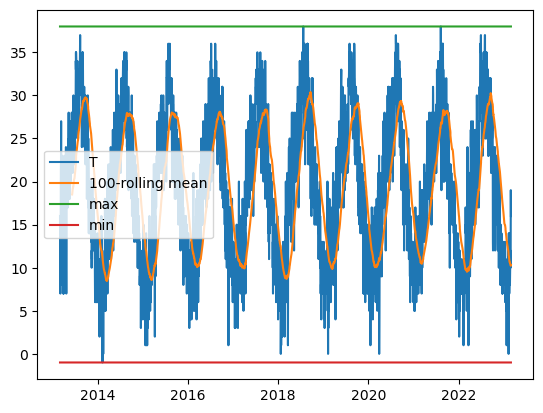

In [64]:
#data['T'].rolling(100).mean()

x = data['date']
plt.plot(x, data['T'], label = 'T')
plt.plot(x, data['T'].rolling(100).mean(), label = '100-rolling mean')
plt.plot(x, data['Tmax'], label = 'max')
plt.plot(x, data['Tmin'], label = 'min')
plt.legend()

/tmp/ipykernel_10623/3157517311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafiltered['Tmin'] = datafiltered['T'].min()
/tmp/ipykernel_10623/3157517311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafiltered['Tmax'] = datafiltered['T'].max()
/tmp/ipykernel_10623/3157517311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

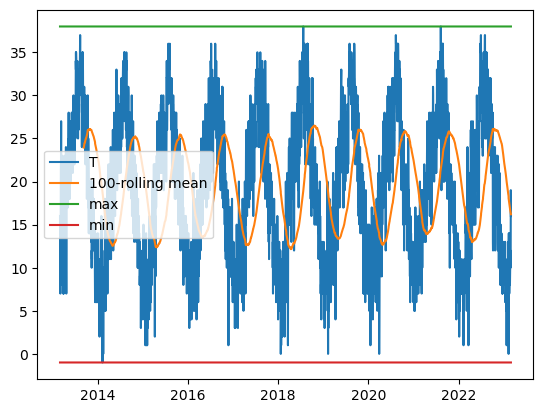

In [65]:
datafiltered['Tmin'] = datafiltered['T'].min()
datafiltered['Tmax'] = datafiltered['T'].max()
datafiltered['Tmean'] = datafiltered['T'].mean()

x = datafiltered['date']
plt.plot(x, datafiltered['T'], label = 'T')
plt.plot(x, datafiltered['T'].rolling(200).mean(), label = '100-rolling mean')
plt.plot(x, datafiltered['Tmax'], label = 'max')
plt.plot(x, datafiltered['Tmin'], label = 'min')
plt.legend()

<Axes: >

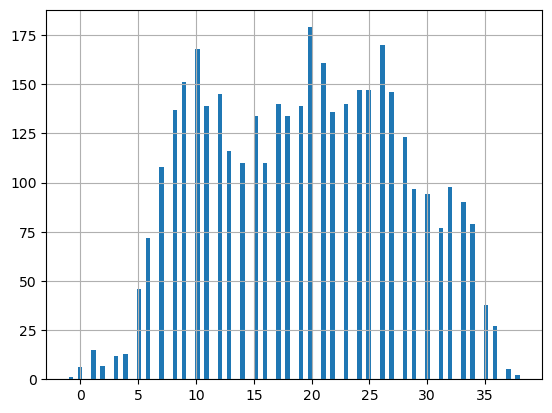

In [66]:
#data['T'].hist()
data['T'].hist(bins=100)

In [67]:
quantile_95 = data['T'].quantile(0.95)

In [68]:
quantile_05 = data['T'].quantile(0.05)

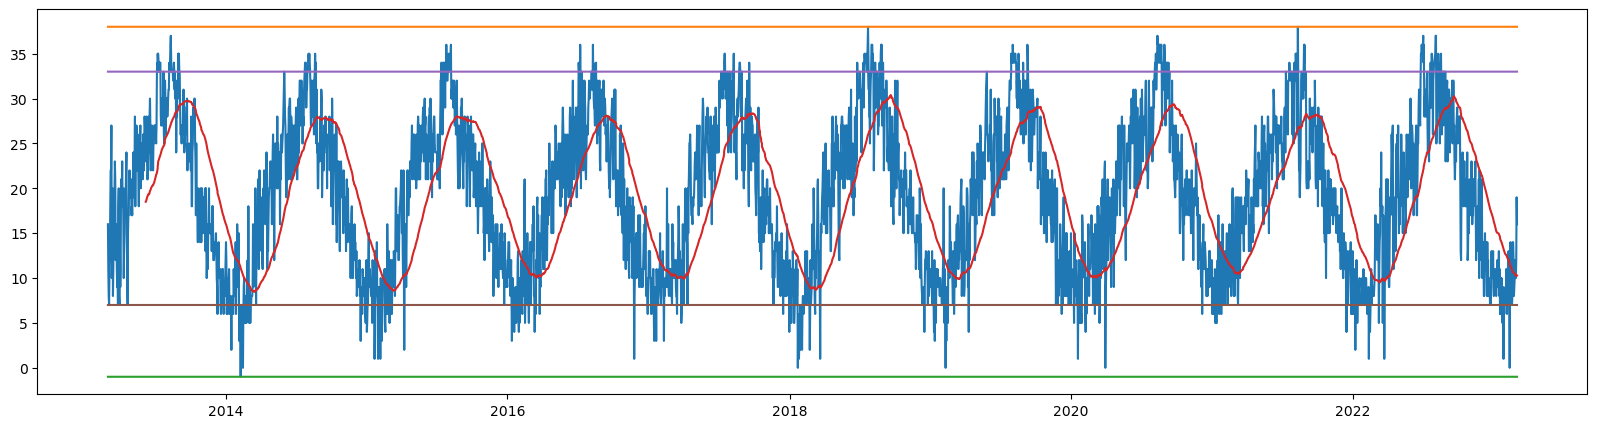

In [69]:
data['quantile_95'] = data['T'].quantile(0.95)
data['quantile_05'] = data['T'].quantile(0.05)
plt.figure(figsize = (20, 5))
x = data['date']
plt.plot(x, data['T'], label = 'T')
#plt.plot(x, data['Tmean'], label = 'mean')
plt.plot(x, data['Tmax'], label = 'max')
plt.plot(x, data['Tmin'], label = 'min')
plt.plot(x, data['T'].rolling(100).mean(), label = '100-rolling mean')
plt.plot(x, data['quantile_95'], label = 'quantile_95')
plt.plot(x, data['quantile_05'], label = 'quantile_05')


In [70]:
# Correlation

data.corr()

/tmp/ipykernel_10623/2418023076.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,level_0,index,T,P0,P,U,Ff,ff10,Td,Tmin,Tmax,Tmean,quantile_95,quantile_05
level_0,1.000000,-1.000000,-0.015294,0.051872,0.051940,0.116762,-0.062397,-0.103541,0.056622,NaN,NaN,NaN,NaN,NaN
index,-1.000000,1.000000,0.015294,-0.051872,-0.051940,-0.116762,0.062397,0.103541,-0.056622,NaN,NaN,NaN,NaN,NaN
T,-0.015294,0.015294,1.000000,-0.362264,-0.379404,0.140622,-0.023232,-0.168193,0.837813,NaN,NaN,NaN,NaN,NaN
P0,0.051872,-0.051872,-0.362264,1.000000,0.999815,-0.216050,-0.145241,-0.172320,-0.376916,NaN,NaN,NaN,NaN,NaN
P,0.051940,-0.051940,-0.379404,0.999815,1.000000,-0.217291,-0.143714,-0.168749,-0.390759,NaN,NaN,NaN,NaN,NaN
U,0.116762,-0.116762,0.140622,-0.216050,-0.217291,1.000000,-0.134464,-0.064171,0.648464,NaN,NaN,NaN,NaN,NaN
Ff,-0.062397,0.062397,-0.023232,-0.145241,-0.143714,-0.134464,1.000000,0.935795,-0.109813,NaN,NaN,NaN,NaN,NaN
ff10,-0.103541,0.103541,-0.168193,-0.172320,-0.168749,-0.064171,0.935795,1.000000,-0.152243,NaN,NaN,NaN,NaN,NaN
Td,0.056622,-0.056622,0.837813,-0.376916,-0.390759,0.648464,-0.109813,-0.152243,1.000000,NaN,NaN,NaN,NaN,NaN
Tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


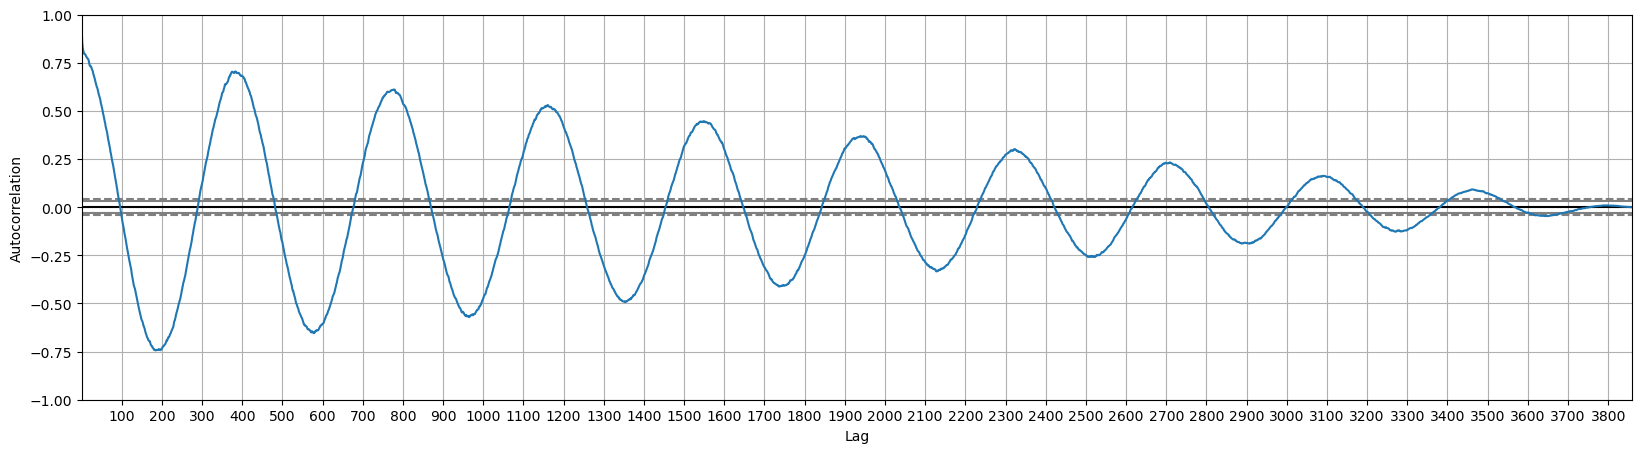

In [74]:
# Visualizing year seasons

plt.figure(figsize=(20,5))
autocorrelation_plot(data['T'])
plt.locator_params(axis = 'x', nbins = 50)

In [78]:
# Trend
model = LinearRegression()

X = pd.DataFrame(data.index)
Y = data['T']

model.fit(X,Y)

LinearRegression()

In [79]:
prediction = model.predict(X)

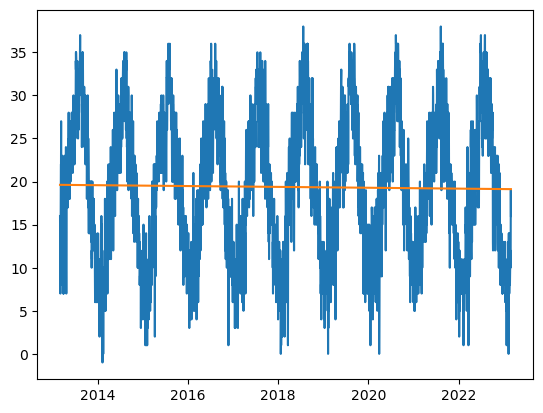

In [80]:
x = data['date']
y = data['T']

plt.plot(x, y)
plt.plot(x, prediction)

In [81]:
prediction

array([19.61801723, 19.61788828, 19.61775933, ..., 19.12077397,
       19.12064502, 19.12051607])

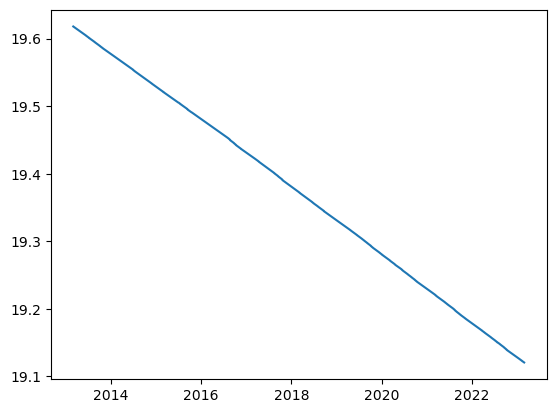

In [83]:
#  Можна бачити тренд: середня температура в Токіо знизилась на 0.5 градуса Цельсія: з 19.6 до 19.1
plt.plot(data['date'], model.predict(pd.DataFrame(X)))

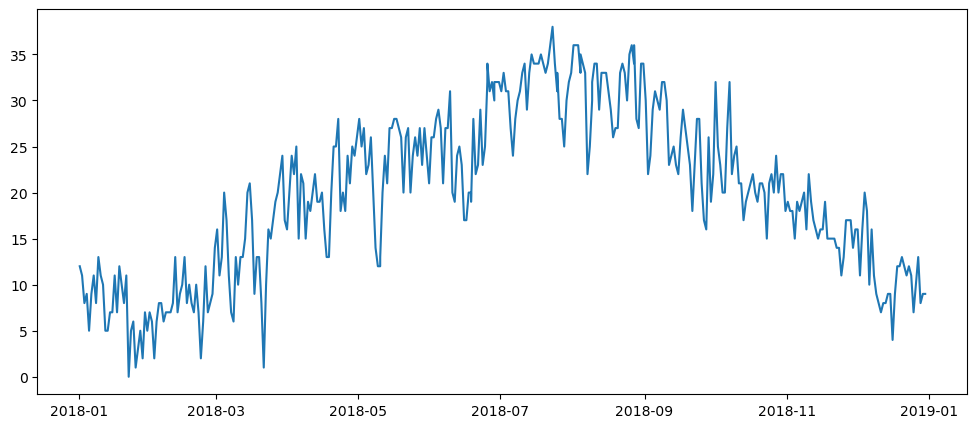

In [88]:
start_date = pd.Timestamp(day=1, month=1, year=2018)
end_date = pd.Timestamp(day=31, month=12, year=2018)

condition1 = data['date'] >= start_date
data1 = data[condition1]
condition2 = data1['date'] <= end_date
data2 = data1[condition2]

# other methods to filter initial data:
#
# 1) data3 = data[condition1 & condition2]
#
# 2) data4 = data[data['date'].between(start_date, end_date)]
#
#
plt.figure(figsize = (12,5))
x = data2['date']
y = data2['T']
plt.plot(x,y)